In [1]:
#load the dataset 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor

df=pd.read_csv('/Users/arijit.banerjee/Downloads/housing 2.csv')



In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
# Seperate into Train and Test DataFrames

df = df.sample(frac=1, random_state=2)
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)


train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


In [5]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-121.60,39.80,10.0,1742.0,307.0,721.0,312.0,2.4537,117900.0,INLAND
3429,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0,<1H OCEAN
3430,-117.40,33.95,46.0,2189.0,423.0,866.0,389.0,3.1384,111500.0,INLAND
3431,-118.15,34.14,52.0,403.0,117.0,361.0,105.0,1.6250,187500.0,<1H OCEAN


In [6]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Dimensionality Reduction

In [8]:
from sklearn.metrics import mean_absolute_error

average_median_house_value = train_df['median_house_value'].mean()
baseline_model_test_predictions = [average_median_house_value] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

90952.86688447764

In [9]:
# Observe correlation between total_rooms, total_bedrooms and households

train_df[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


In [10]:
# Train PCA (Linear Dimensionality Reduction) with 2-feature output


In [11]:
# Get X_train_3 which has total_rooms, total_bedrooms, and households as inputs

import numpy as np

X_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_train_3.shape

(17000, 3)

In [12]:
# Get X_test_3 which has total_rooms, total_bedrooms, and households as inputs

X_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_test_3.shape

(3433, 3)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)


In [14]:
# Use PCA to transform X_train_3 and X_test_3 into X_train_pca and X_test_pca

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_train_pca.shape, X_test_pca.shape

((17000, 2), (3433, 2))

In [15]:
X_train_3

array([[2781.,  574.,  519.],
       [1233.,  214.,  199.],
       [4166.,  756.,  743.],
       ...,
       [1895.,  424.,  417.],
       [3354.,  659.,  648.],
       [1027.,  258.,  248.]])

In [16]:
X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)


(array([1.2712e+04, 3.4710e+03, 5.6300e+02, 1.4500e+02, 6.0000e+01,
        2.2000e+01, 1.6000e+01, 7.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-1.2687919 ,  0.24853723,  1.76586636,  3.28319549,  4.80052461,
         6.31785374,  7.83518287,  9.352512  , 10.86984112, 12.38717025,
        13.90449938]),
 <BarContainer object of 10 artists>)

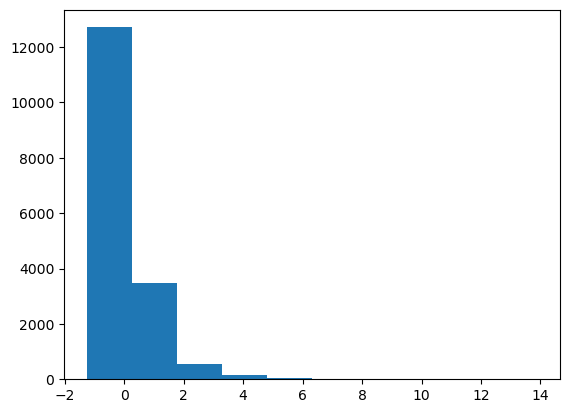

In [17]:
# Test different preprocessing functions on X_train_3

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

scaler = StandardScaler().fit(X_train_3)
X_train_3_scaled = scaler.transform(X_train_3)

plt.hist(X_train_3_scaled[:, 1])

In [18]:
# Create Pipeline of Normalization -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_pipe_forest = Pipeline(steps=[('Scaler', Normalizer()), 
                                 ('PCA', PCA(n_components=2)), 
                                 ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])
scale_pca_pipe_forest

Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [19]:
# Get error of Normalization -> PCA -> Random Forest pipeline

scale_pca_pipe_forest.fit(X_train_3, y_train)
scale_pca_pipe_forest_test_predictions = scale_pca_pipe_forest.predict(X_test_3)

mean_absolute_error(y_test, scale_pca_pipe_forest_test_predictions)

77332.12313993662